In [1]:
import SoccerNet
from SoccerNet.Downloader import SoccerNetDownloader
mySoccerNetDownloader = SoccerNetDownloader(LocalDirectory="C:/Users/maxen/OneDrive/Documents/GitHub/proj0021-sports-and-movement-football-comments")
mySoccerNetDownloader.password = "s0cc3rn3t"

In [ ]:
# Download the videos of 224p resolution
mySoccerNetDownloader.downloadGames(files=["1_224p.mkv", "2_224p.mkv"], split=["train","valid","test","challenge"])

In [ ]:
# Download the actions images
mySoccerNetDownloader.downloadGames(files=["Frames-v3.zip"], split=["train","valid","test"], task="frames")

In [ ]:
# Download videos at 2fps with features extraction from baidu
mySoccerNetDownloader.downloadGames(files=["1_baidu_soccer_embeddings.npy", "2_baidu_soccer_embeddings.npy"], split=["train","valid","test","challenge"])

In [2]:
# Download the labels
mySoccerNetDownloader.downloadGames(files=["Labels-v2.json"], split=["train","valid","test"])

FileNotFoundError: [WinError 2] Le fichier spécifié est introuvable: 'C:/Users/maxen/OneDrive/Documents/GitHub/proj0021-sports-and-movement-football-comments\\england_epl\\2015-2016\\2015-08-08 - 19-30 Chelsea 2 - 2 Swansea\\Labels-v2.json'

ok
0
1
3000


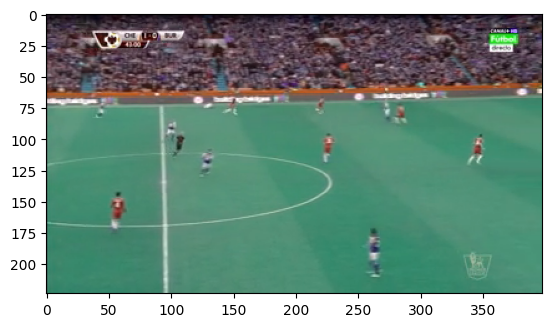

In [1]:
import cv2

def imagesFromMkv(mkvFile: str, time_min: int, time_sec: int, fps: int = 25) -> list:
    """_summary_

    Args:
        mkvFile (str): mkv file path
        time_min (int): minutes of the images in the mkv file
        time_sec (int): seconds of the images in the mkv file
        fps (int, optional): frame per second of the mkv file. Defaults to 25.

    Returns:
        list: the images of the corresponding time stamp
    """
    cap = cv2.VideoCapture(mkvFile)
    cap.set(cv2.CAP_PROP_POS_MSEC, (time_min * 60 + time_sec) * 1000)
    print("ok")
    images = []
    ret = True
    i = 0
    while ret:
        if i % (fps * 60) == 0:
            print(i // (fps * 60))
        i += 1
        ret, frame = cap.read()
        images.append(frame)
    return images

images = imagesFromMkv("Database/la_liga/1_224p.mkv", 43, 0)
print(len(images))
# display first image of images
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.show()



In [ ]:
# Managing the names of the folders downloaded

import os
def removeSpacesFolders(path: str) -> None:
    """Remove the spaces in the folder name and all the subfolders in it recursively. The spaces are replaced by underscores.

    Args:
        path (str): path of the initial folder
    """
    for folder in os.listdir(path):
        if os.path.isdir(os.path.join(path, folder)):
            removeSpacesFolders(os.path.join(path, folder))
        if " " in folder:
            os.rename(os.path.join(path, folder), os.path.join(path, folder.replace(" ", "_")))        
removeSpacesFolders("england_epl")

In [ ]:
# Copy files from a system to another one.
import shutil
import os


def copyFiles(path_move_from: str, path_move_to: str):
    """Copy files from one path to another and create the folders if they don't exist. If the files have already been copied, they are not copied again.

    Args:
        path_move_from (str): path of the initial folder
        path_move_to (str): path of the final folder
    """
    for folder in os.listdir(path_move_from):
        if os.path.isdir(os.path.join(path_move_from, folder)):
            if not os.path.isdir(os.path.join(path_move_to, folder)):
                os.mkdir(os.path.join(path_move_to, folder))
            copyFiles(os.path.join(path_move_from, folder), os.path.join(path_move_to, folder))
        else:
            if not os.path.isfile(os.path.join(path_move_to, folder)):
                shutil.copy(os.path.join(path_move_from, folder), os.path.join(path_move_to, folder))
copyFiles("Database", "C:/Users/maxen/OneDrive/Documents/GitHub/proj0021-sports-and-movement-football-comments/Database")

In [ ]:
# Delete files from a path
def deleteFiles(path: str):
    """Delete all the files in a folder and all the subfolders in it recursively.

    Args:
        path (str): path of the initial folder
    """
    for folder in os.listdir(path):
        if os.path.isdir(os.path.join(path, folder)):
            deleteFiles(os.path.join(path, folder))
        else:
            os.remove(os.path.join(path, folder))
